# Breast Cancer Wisconsin (Prognostic) Data Set Analysis

Ernesto Ramírez Abitia

## First look at the data

From the website (https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wpbc.names) we have the following description of the data: 
    
    Each record represents follow-up data for one breast cancer
	case.  These are consecutive patients seen by Dr. Wolberg
	since 1984, and include only those cases exhibiting invasive
	breast cancer and no evidence of distant metastases at the
	time of diagnosis. 

	The first 30 features are computed from a digitized image of a
	fine needle aspirate (FNA) of a breast mass.  They describe
	characteristics of the cell nuclei present in the image.

We will start by importing the data and getting some basic notions about it.

In [1]:
import pandas as pd

In [2]:
cols = ['Id','Diagnosis','radius mean','texture mean','perimeter mean','area mean','smoothness mean','compactness mean','concavity mean','concave points mean','symmetry mean','fractal dimension mean','radius se','texture se','perimeter se','area se','smoothness se','compactness se','concavity se','concave points se','symmetry se','fractal dimension se','radius worst','texture worst','perimeter worst','area worst','smoothness worst','compactness worst','concavity worst','concave points worst','symmetry worst','fractal dimension worst']
data = pd.read_csv('wdbc_data.csv', names = cols)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
Id                         569 non-null int64
Diagnosis                  569 non-null object
radius mean                569 non-null float64
texture mean               569 non-null float64
perimeter mean             569 non-null float64
area mean                  569 non-null float64
smoothness mean            569 non-null float64
compactness mean           569 non-null float64
concavity mean             569 non-null float64
concave points mean        569 non-null float64
symmetry mean              569 non-null float64
fractal dimension mean     569 non-null float64
radius se                  569 non-null float64
texture se                 569 non-null float64
perimeter se               569 non-null float64
area se                    569 non-null float64
smoothness se              569 non-null float64
compactness se             569 non-null float64
concavity se               569 non

From the above we note that there is no missing data so we can start working immedately with it without worrying about missing values. Let's take a look at the basic statistics for the whole data set.

In [3]:
data.describe()

,Id,radius mean,texture mean,perimeter mean,area mean,smoothness mean,compactness mean,concavity mean,concave points mean,symmetry mean,...,radius worst,texture worst,perimeter worst,area worst,smoothness worst,compactness worst,concavity worst,concave points worst,symmetry worst,fractal dimension worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


The feature Id is useless for our purposes so let us change it to use it as index for the data frame.

In [4]:
data.set_index('Id', inplace=True)
data.describe()

,radius mean,texture mean,perimeter mean,area mean,smoothness mean,compactness mean,concavity mean,concave points mean,symmetry mean,fractal dimension mean,...,radius worst,texture worst,perimeter worst,area worst,smoothness worst,compactness worst,concavity worst,concave points worst,symmetry worst,fractal dimension worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


From the above table we see that for the perimeter feature we have the following statistics for the mean, standard deviation and median (represented by the 50th percentile):

In [5]:
data[['perimeter mean', 'perimeter se', 'perimeter worst']].describe()

,perimeter mean,perimeter se,perimeter worst
count,569.000000,569.000000,569.000000
mean,91.969033,2.866059,107.261213
std,24.298981,2.021855,33.602542
min,43.790000,0.757000,50.410000
25%,75.170000,1.606000,84.110000
50%,86.240000,2.287000,97.660000
75%,104.100000,3.357000,125.400000
max,188.500000,21.980000,251.200000


## Is the radius normally distributed?

Let's now see if the first feature in the data set, radius, is normally distributed.

In [6]:
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline

We first get the values for the radius in an array.

In [7]:
z=data.iloc[:,1].values

We can now use a Q-Q plot to compare the quantiles. If the distributions we are comparing are similar, then the points in the plot should appear close to the line $y=x$ and should resemble a straight line.

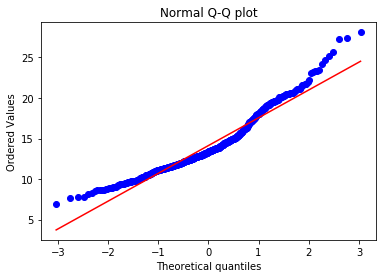

In [8]:
stats.probplot(z, dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

From the above plot, we deduce that the data for the radius mean does not follow a normal distribution. Let's quantify this by using scipy's built in test. From the documentation we know that "It is based on which is based on D’Agostino and Pearson’s test that combines skew and kurtosis to produce an omnibus test of normality." This function tests the null hypothesis that a sample comes from a normal distribution. See https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html

In [9]:
k2, p = stats.normaltest(z)
alpha = 1e-3
print("p = {:g}".format(p))
if p < alpha:  # null hypothesis: x comes from a normal distribution
     print("The null hypothesis can be rejected")
else:
     print("The null hypothesis cannot be rejected")

p = 1.28617e-16
The null hypothesis can be rejected


Hence we can be sure that the data does not follow a normal distribution. Let's take a look at the histogram.

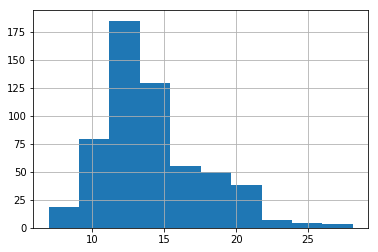

In [10]:
data['radius mean'].hist()
plt.show()

The histogram shows that the data is skewed to the right. Based on the histogram we suggest a Weibull distribution would be able to describe the data better. However, we would prefer to use the Box-Cox transformation to normalize the data and look at the Q-Q plot for the transformed data.

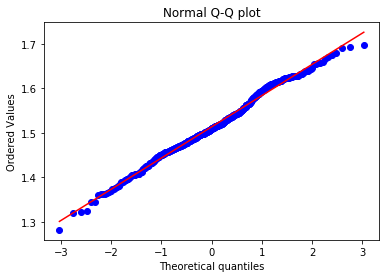

In [11]:
z_norm, _ = stats.boxcox(z)
stats.probplot(z_norm, dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

The above Q-Q plot is a lot closer to what we would expect with normally distributed data. Let's quantify this using the normaltest.

In [13]:
k2, p = stats.normaltest(z_norm)
alpha = 1e-3
print("p = {:g}".format(p))
if p < alpha:  # null hypothesis: x comes from a normal distribution
     print("The null hypothesis can be rejected")
else:
     print("The null hypothesis cannot be rejected")

p = 0.88588
The null hypothesis cannot be rejected


Hence, we have transformed the data to follow a normal distribution and we don't need to use a Weibull distribution anymore.

## Training classifiers

Given the data and the problem at hand, we will train a decision tree and a SVM to predict if a tumour will be malignant or benign. We will compare the accuracy for both models.

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.svm import SVC

First we will split the data in two: a training and a test set. We will use this sets to train all the following models.

In [15]:
X = data.values[:, 1:31]
Y = data.values[:, 0]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 100)

### Training a decision tree

Trees are usually a good first choice for a quick exploratory analysis and to create a quick model that is able to give reasonable predictions. It is also very helpful to know which features might be the most relevant for the probelm in hand.

We will train a tree using the gini index as opposed to enthropy. Most of the times it doesn't matter which one we use, and for complex calculations, gini index is simpler to compute. To keep the tree as simple as possible we will select a maximum depth of 3. Finally, we will set the minimum number of samples required to be at a leaf node to 5 to make a node significant.

In [16]:
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=3, min_samples_leaf=5)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

It is very easy to visualize a tree:

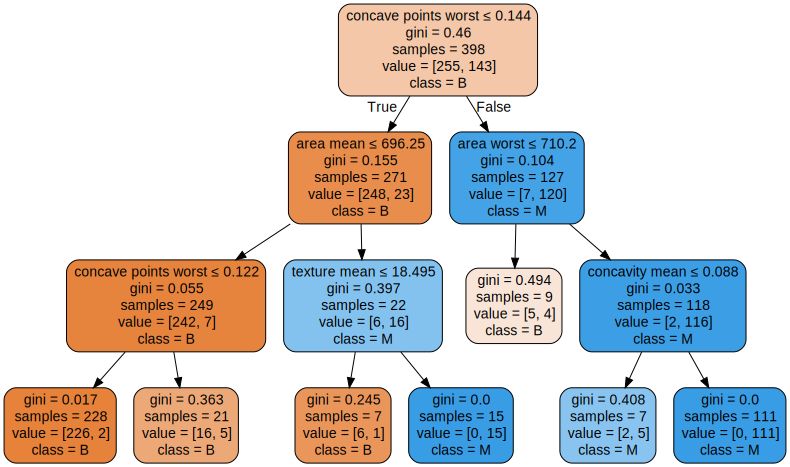

In [28]:
import graphviz
dot_data = tree.export_graphviz(clf_gini, out_file=None, feature_names=list(data)[1:31], class_names=clf_gini.classes_, filled=True, rounded=True, special_characters=True)  
graph = graphviz.Source(dot_data)
graph 

We can now use this model to make some predictions and get the accuracy of the model:

In [17]:
y_pred = clf_gini.predict(X_test)
print("Accuracy is ", accuracy_score(y_test,y_pred)*100)

Accuracy is  94.7368421053


### Training a SVM

Thinking that the data might be separable in a hyperplane, we choose a support vector machine as our second algorithm to train.

In [19]:
svm = SVC()
svm.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

We can now use this model to make some predictions and get the accuracy of the model:

In [20]:
y_pred = svm.predict(X_test)
print("Accuracy is ", accuracy_score(y_test,y_pred)*100)

Accuracy is  59.649122807


## Comparison

Based purely on the accuracy of the trained models, we easily conclude that the tree is the better predictor for the data. It is very likely that this is due to the inseparability of the data in a hyperplane. Maybe there exists no hyperplane that neatly separates the data and we would need to use another model.

The trained tree seems to have a very good accuracy. We could start training different trees changing their properties to fine tune them and get better results. However, we should also be careful to avoid overfitting. If we were to use a tree for this problem, it would be a very good idea to explore also random forests.

## Notes

We could have compared the models in a different way. We could have used cross validation to train $k$ times each algorithm (using the same seed to ensure we get the same $k$ folds). Then we could have calculated the mean accuracy and the mean standard deviation using the cros_val_score function from model_selection. finally we can show the results graphically with a box plot. We could then choose the algorithm with the least standard deviation and higher accuracy mean, or if this is not possible, choose depending on what is needed.